# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





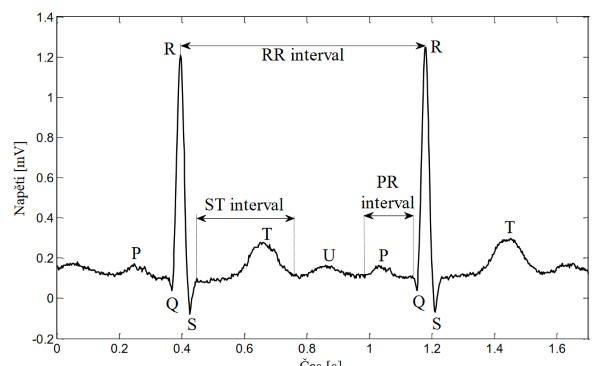

#### EKG ve spektru

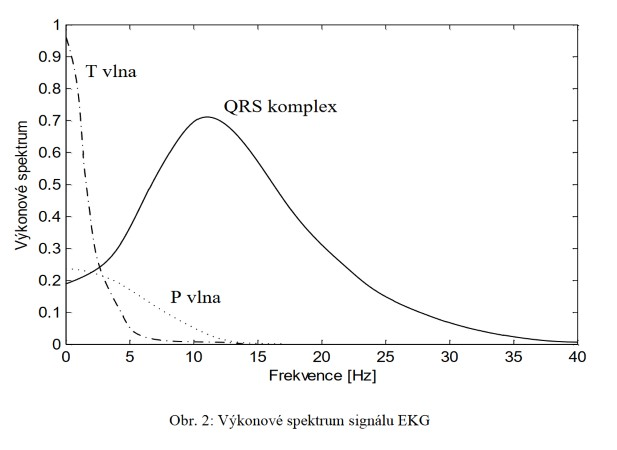

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [1]:
import scipy.signal
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import os

if not os.path.exists("xgaens00.wav"):
    !wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xgaens00.wav

if not os.path.exists("FIS.wav"):
    !wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav

if not os.path.exists("KES.wav"):
    !wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xgaens00.wav")

--2023-12-19 10:38:25--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.2’

FIB.wav.2           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-19 10:38:27 (92.3 MB/s) - ‘FIB.wav.2’ saved [10044/10044]



## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

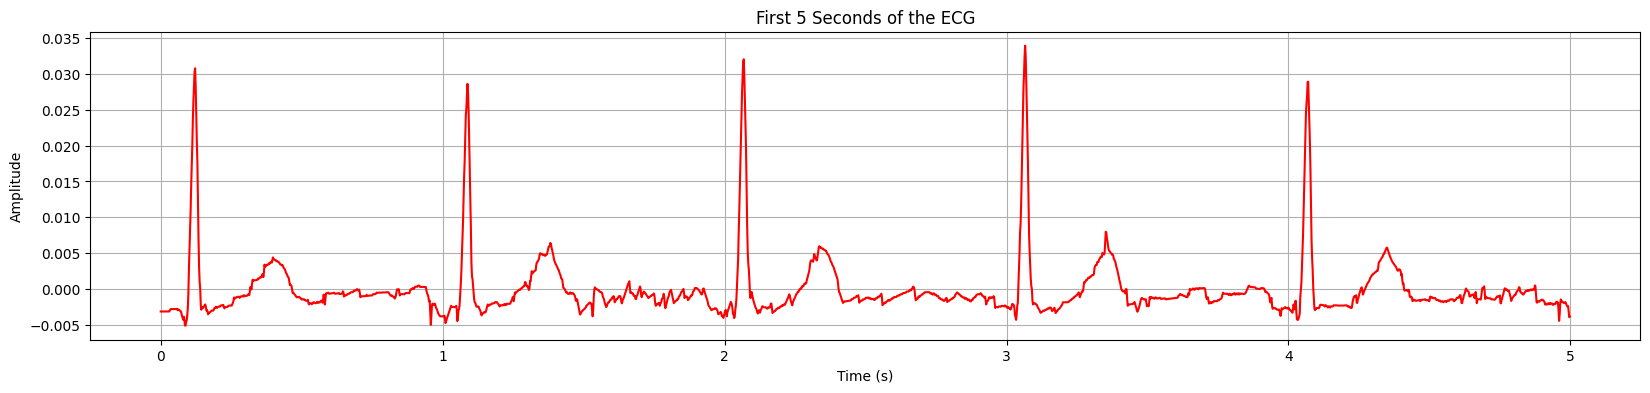

In [2]:
shortened_signal = x[:5 * fs]
time = np.arange(0, 5, 1 / fs)

plt.figure(figsize=(20, 4))
plt.title('First 5 Seconds of the ECG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.plot(time, shortened_signal, color='red')
plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

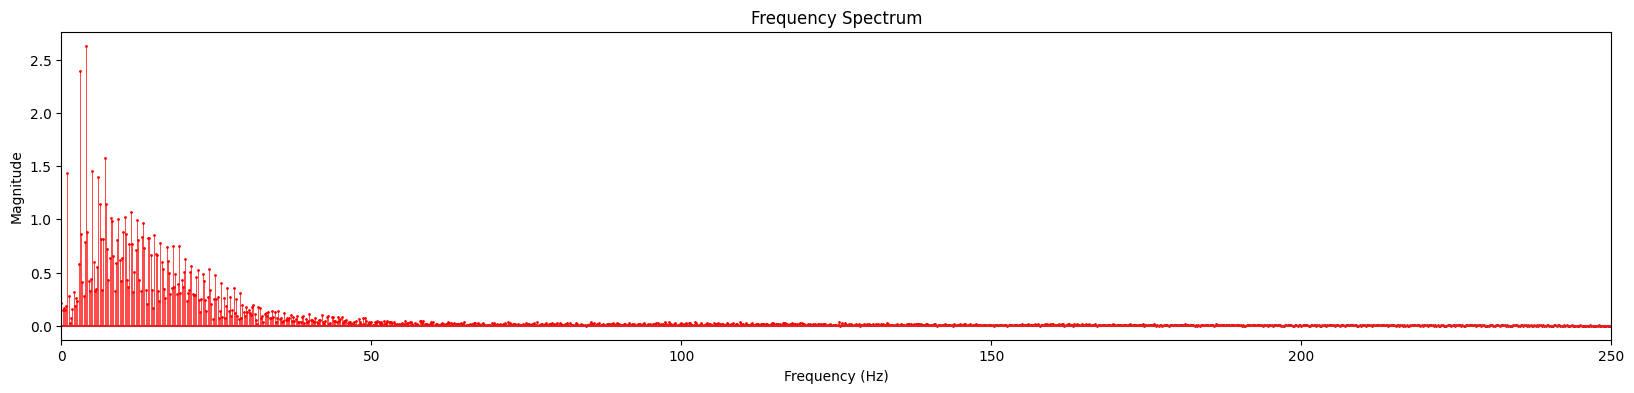

In [3]:
frequency_bins = np.fft.fftfreq(5 * fs, d=1 / fs)
fft_values = np.fft.fft(shortened_signal)
magnitude_spectrum = np.abs(fft_values)

# Plot the magnitude spectrum
plt.figure(figsize=(20, 4))
markerline, stemlines, _ = plt.stem(frequency_bins, magnitude_spectrum, linefmt='red', markerfmt='ro')
plt.setp(markerline, markersize=1)
plt.setp(stemlines, linewidth=0.5)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, fs / 2)

# Show the plot
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

The 50Hz or 60Hz interference is caused by some electrical wires that are running alongside the ECG. The wires are acting as an antenna and picking up the 50Hz or 60Hz signal from the power lines.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [4]:
band_limit = fs // 2
band_limit_index = int(band_limit * x.size / fs)

fouriered_signal = np.fft.fft(x)

for i in range(band_limit_index + 1, len(fouriered_signal) - band_limit_index):
    fouriered_signal[i] = 0

filtered_signal = np.real(np.fft.ifft(fouriered_signal))

resampled_signal = filtered_signal[::fs // 100]

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

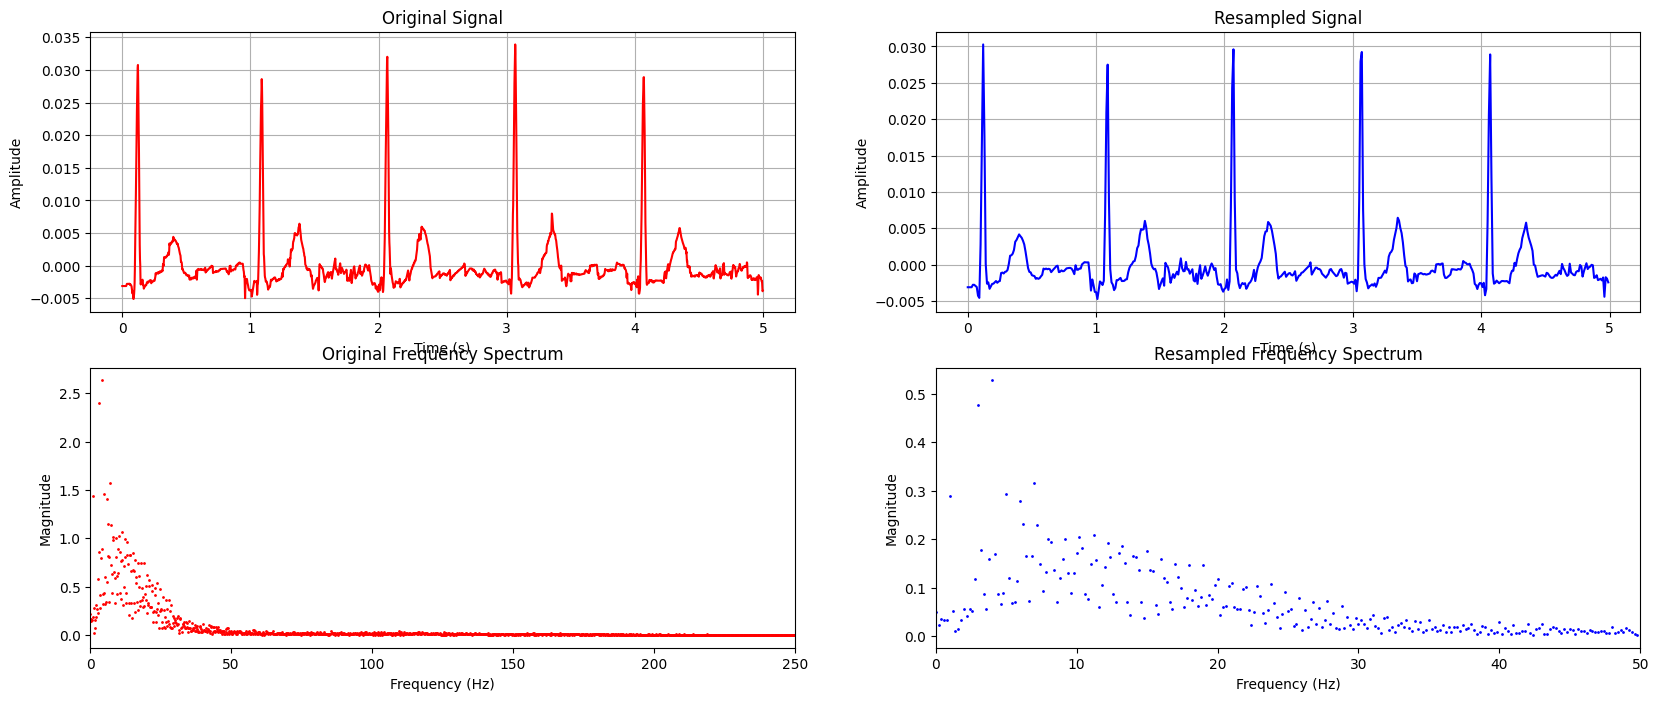

In [5]:
# show the original signal, the resampled signal, and both of their spectrums
# create 4 graphs
fig, axs = plt.subplots(2, 2, figsize=(20, 8))
resampled_shortened_signal = resampled_signal[:5 * 100]

# plot the original signal
axs[0, 0].set_title('Original Signal')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].grid()
axs[0, 0].plot(time, shortened_signal, color='red')

# plot the resampled signal
resampled_time = np.arange(0, 5, 1 / 100)
axs[0, 1].set_title('Resampled Signal')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')
axs[0, 1].grid()
axs[0, 1].plot(resampled_time, resampled_shortened_signal, color='blue')

# plot the original signal's spectrum
# Plot the magnitude spectrum
axs[1, 0].scatter(frequency_bins, magnitude_spectrum, color='red', marker='o', s=1)
axs[1, 0].set_title('Original Frequency Spectrum')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Magnitude')
axs[1, 0].set_xlim(0, fs / 2)

# plot the resampled signal's spectrum
resampled_frequency_bins = np.fft.fftfreq(resampled_shortened_signal.size, d=1 / 100)
resampled_fft_values = np.fft.fft(resampled_shortened_signal)
resampled_magnitude_spectrum = np.abs(resampled_fft_values)

# Plot the magnitude spectrum
axs[1, 1].scatter(resampled_frequency_bins, resampled_magnitude_spectrum, color='blue', marker='o', s=1)
axs[1, 1].set_title('Resampled Frequency Spectrum')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim(0, 50)

# show the plot
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

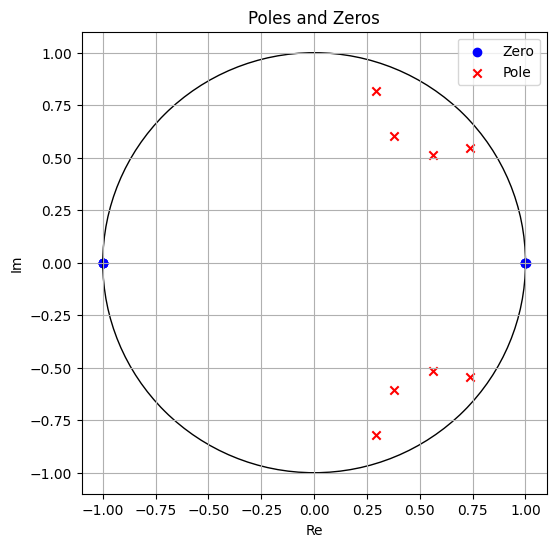

In [6]:
from scipy import signal

lowcut = 10 * (500 / 100)
highcut = 20 * (500 / 100)
order = 4

nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Corrected assignment of b and a
b, a = signal.butter(order, [low, high], btype='band')

zero, pole, gain = signal.tf2zpk(b, a)
plt.figure(figsize=(6, 6))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('Poles and Zeros')
plt.grid()
plt.scatter(np.real(zero), np.imag(zero), marker='o', color='blue', label='Zero')
plt.scatter(np.real(pole), np.imag(pole), marker='x', color='red', label='Pole')
plt.legend()
plt.gca().add_patch(plt.Circle((0, 0), 1, color='black', fill=False))
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


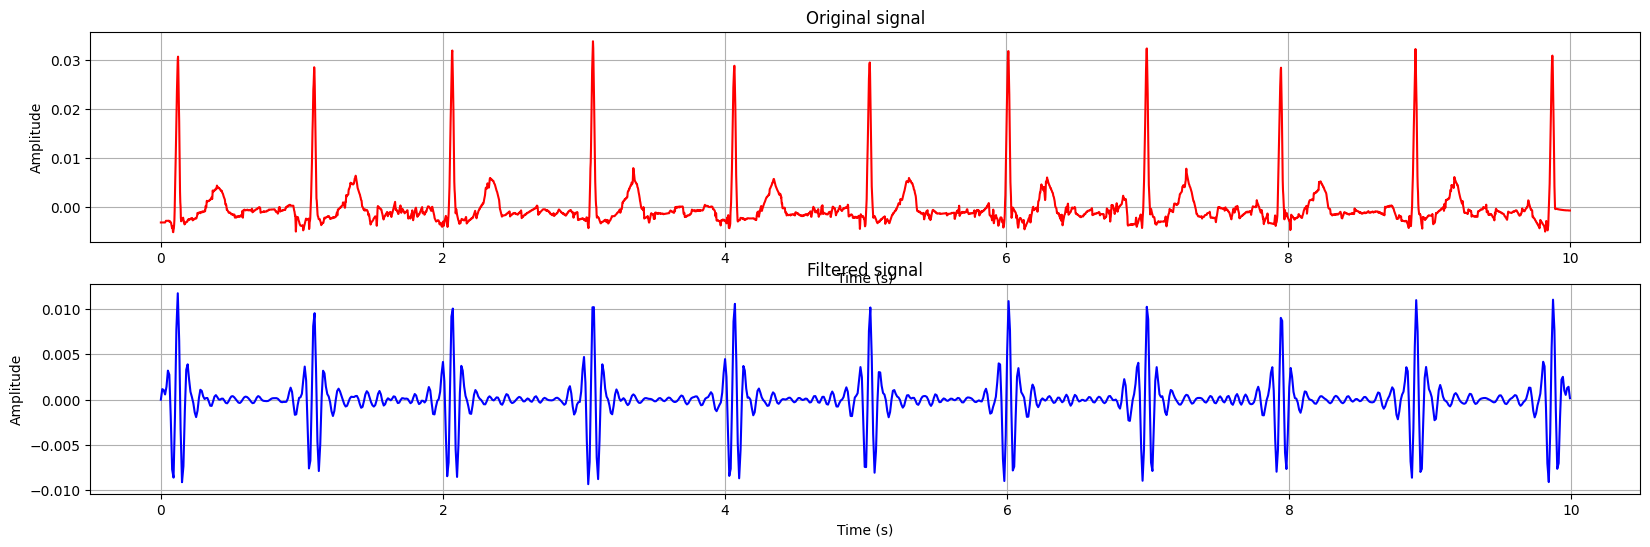

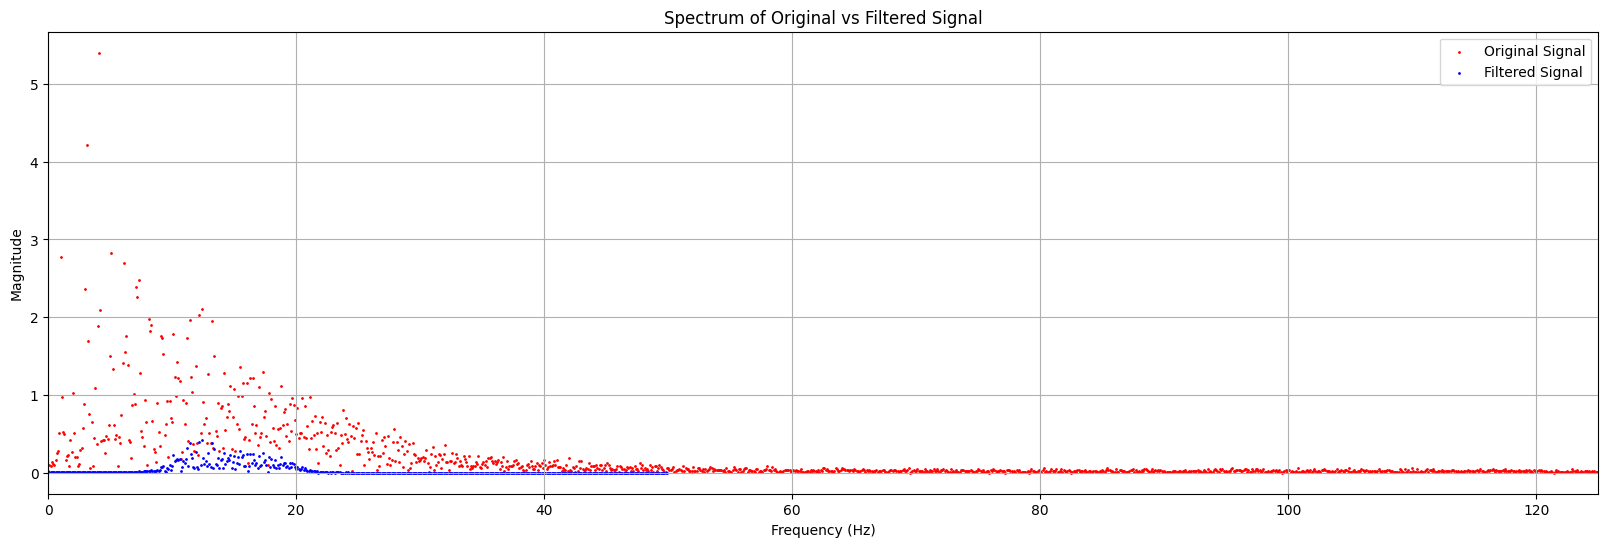

In [7]:
filtered_signal = signal.filtfilt(b, a, resampled_signal)
resampled_time = np.arange(0, 10, 1 / 100)
whole_signal_time = np.arange(0, x.size / fs, 1 / fs)

_, axs = plt.subplots(2, 1, figsize=(20, 6))
axs[0].plot(whole_signal_time, x, label='Original signal', color='red')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Original signal')
axs[0].grid()
axs[1].plot(resampled_time, filtered_signal, label='Filtered signal', color='blue')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Filtered signal')
axs[1].grid()
plt.show()

frequency_bins_whole = np.fft.fftfreq(x.size, d=1 / fs)
spectrum = np.fft.fft(x)
spectrum_filtered = np.fft.fft(filtered_signal)
plt.figure(figsize=(20, 6))
plt.scatter(frequency_bins_whole, np.abs(spectrum), label='Original Signal', s=1, color='red')

filtered_freq_bins = np.fft.fftfreq(resampled_signal.size, d=1 / 100)
plt.scatter(filtered_freq_bins, np.abs(spectrum_filtered), label='Filtered Signal', s=1, color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of Original vs Filtered Signal')
plt.legend()
plt.grid()
plt.xlim(0, fs // 2 / 2)
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



The difference is that the filtered signal has a lowered amplitude on frequencies outside the specified range (10-20Hz). The filtered signal looks a lot smoother than the original signal, because frequencies in the 10-20Hz range aren't very fast, thus the signal looks very "sine-wave-y" instead of jagged.
The largest theoretical shift is after filtering is `filter length - 1`. That is because when convolving, the filter is shifted by one sample each time until it reaches the end of the signal, shifting it by itself minus one sample.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

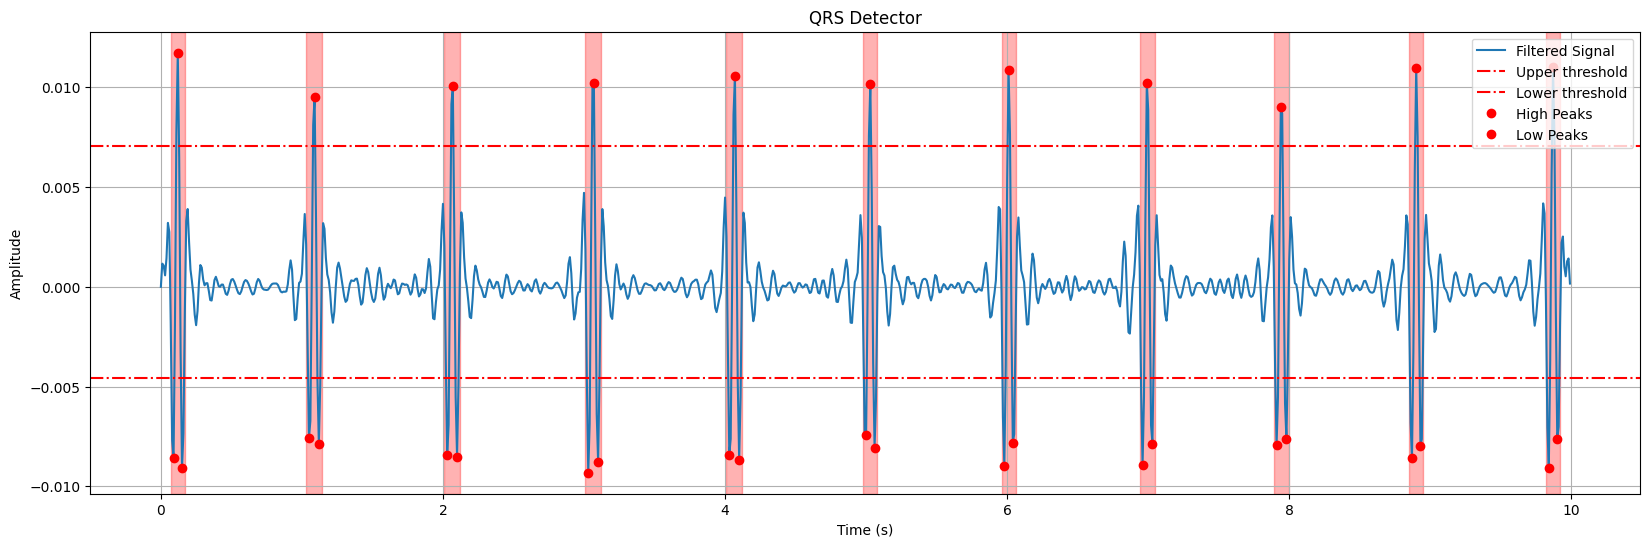

In [8]:
fs = 100
# Settings
upper_threshold_percentage = 0.6
lower_threshold_percentage = 0.5

sample = filtered_signal[:fs // 3]
max_amplitude = np.max(sample)
min_amplitude = np.min(sample)
upper_threshold = upper_threshold_percentage * max_amplitude
lower_threshold = lower_threshold_percentage * min_amplitude

high_peaks = []
for hpeak in signal.argrelextrema(filtered_signal, np.greater, order=1)[0]:
    if filtered_signal[hpeak] > upper_threshold:
        high_peaks.append(hpeak)

low_peaks = []
for lpeak in signal.argrelextrema(filtered_signal, np.less, order=1)[0]:
    if filtered_signal[lpeak] < lower_threshold:
        low_peaks.append(lpeak)

plt.figure(figsize=(20, 6))
plt.plot(resampled_time, filtered_signal, label='Filtered Signal')
for peak in zip(*(iter(low_peaks),) * 2):
    first, second = peak
    plt.axvspan(resampled_time[first] - 0.02, resampled_time[second] + 0.02, color='r', alpha=0.3)
plt.axhline(y=upper_threshold, color='red', linestyle='dashdot', label='Upper threshold')
plt.axhline(y=lower_threshold, color='red', linestyle='dashdot', label='Lower threshold')
plt.plot(resampled_time[high_peaks], filtered_signal[high_peaks], marker='o', color='red', linestyle='None', label='High Peaks')
plt.plot(resampled_time[low_peaks], filtered_signal[low_peaks], marker='o', color='red', linestyle='None', label='Low Peaks')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('QRS Detector')
plt.legend()
plt.grid()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

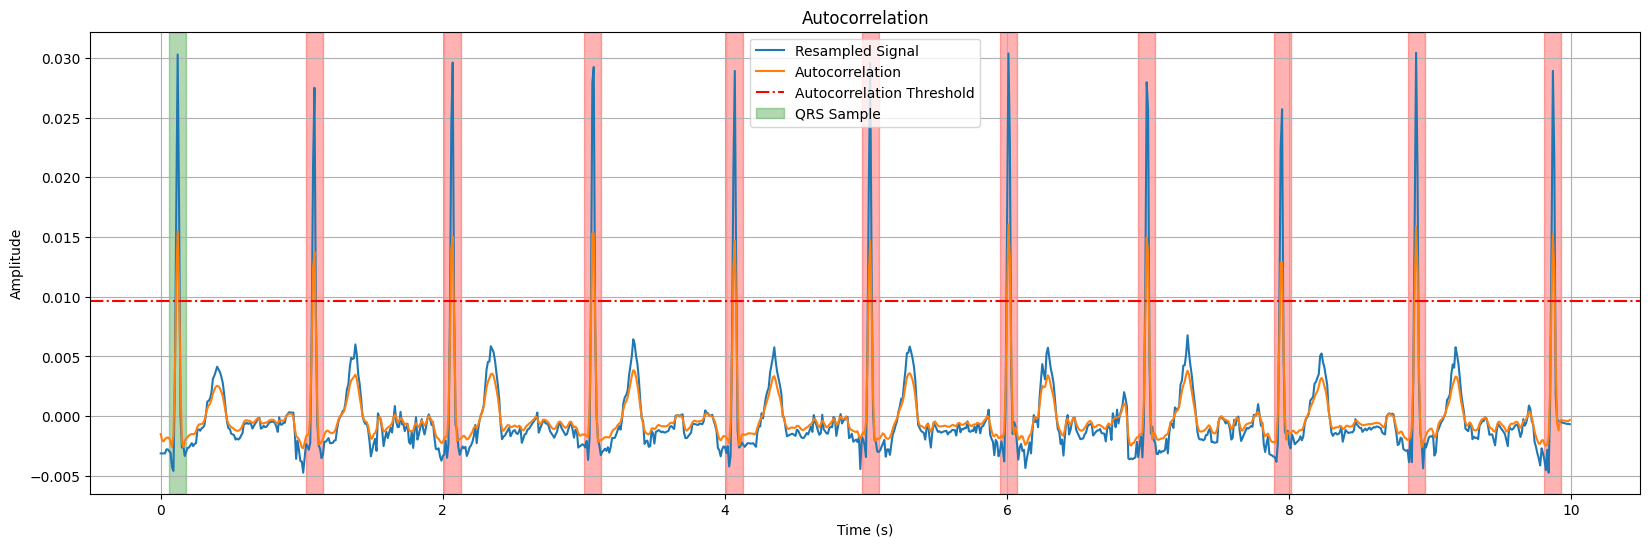

In [9]:
sample = resampled_signal[low_peaks[0]:low_peaks[1]]
autocorrelation = np.correlate(resampled_signal, sample, mode='same') * 10
autocorrelation_threshold = np.max(autocorrelation) * 0.6

correlation_peaks = []
for cpeak in signal.argrelextrema(autocorrelation, np.greater, order=1)[0]:
    if autocorrelation[cpeak] > autocorrelation_threshold:
        correlation_peaks.append(cpeak)

plt.figure(figsize=(20, 6))

unfiltered_peaks = []
unfiltered_peaks.append(signal.argrelextrema(resampled_signal[low_peaks[0] - 3:low_peaks[1] + 3], np.greater, order=1)[0][0] + low_peaks[0] - 3)

for peak in correlation_peaks[1:]:
    unfiltered_peaks.append(signal.argrelextrema(resampled_signal[peak - 3:peak + 3], np.greater, order=1)[0][0] + peak - 3)
    plt.axvspan(resampled_time[peak] - 0.06, resampled_time[peak] + 0.06, color='r', alpha=0.3)

plt.plot(resampled_time, resampled_signal, label='Resampled Signal')
plt.plot(resampled_time, autocorrelation, label='Autocorrelation')
plt.axhline(y=autocorrelation_threshold, color='red', linestyle='dashdot', label='Autocorrelation Threshold')
plt.axvspan((low_peaks[0] - 3) / fs, (low_peaks[1] + 3) / fs, color='green', alpha=0.3, label='QRS Sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Autocorrelation')
plt.grid()
plt.legend()
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

Mělo by to vypadat přibližně takto (před odevzdáním smažte):

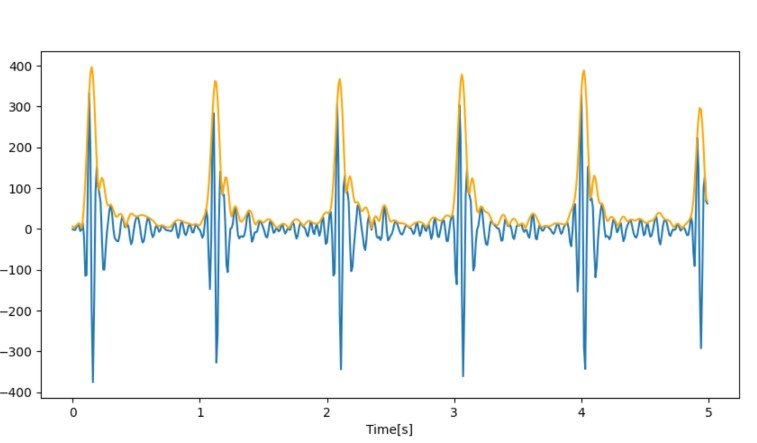

Detekci QRS poté provedete opět prahováním, tentokrát ale obálky signálu.


Při této úloze **nepoužívejte** funkci hilbert z knihovny scipy. Cílem je, abyste si ji napsali sami. Můžete ji použít pouze jako baseline pro porovnání vašich výsledků.



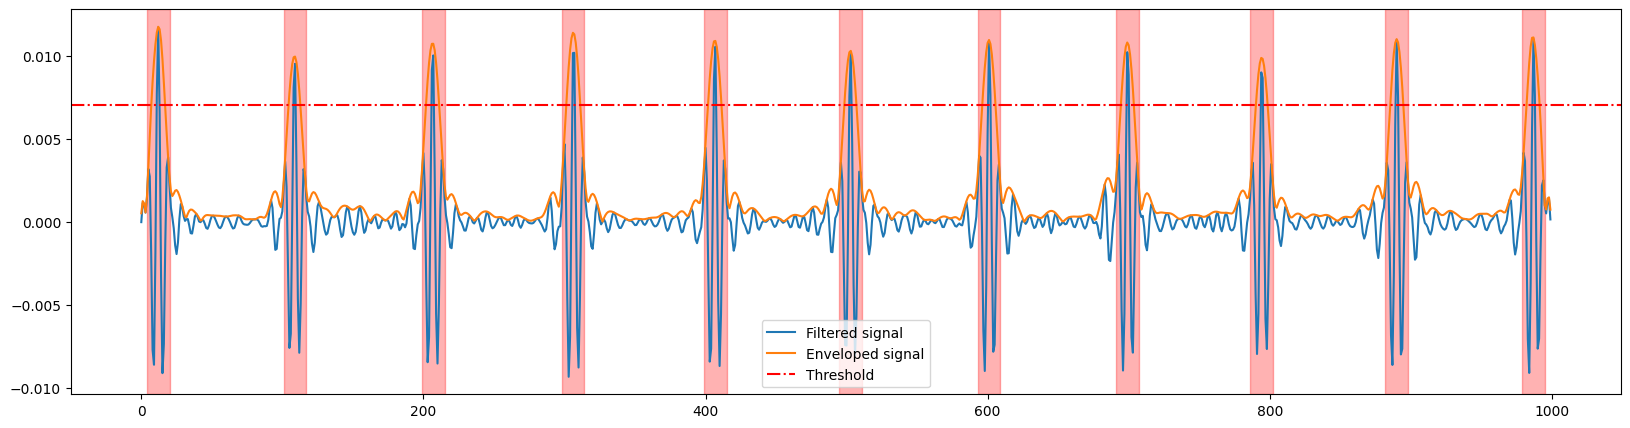

In [10]:
threshold_percentage = 0.6

count = filtered_signal.shape[-1]
Xf = np.fft.fft(filtered_signal, count)
new = np.zeros(count, dtype=Xf.dtype)
if count % 2 == 0:
    new[0] = new[count // 2] = 1
    new[1:count // 2] = 2
else:
    new[0] = 1
    new[1:(count + 1) // 2] = 2

envelope = np.abs(np.fft.ifft(Xf * new))

sample = envelope[low_peaks[0] - 5:low_peaks[1] + 5]
max_amplitude = np.max(sample)
threshold = threshold_percentage * max_amplitude

# Finding peaks in the envelope
peaks = []
for peak in signal.argrelextrema(envelope, np.greater, order=1)[0]:
    if envelope[peak] > threshold:
        peaks.append(peak)

plt.figure(figsize=(20, 5))

plt.plot(filtered_signal, label='Filtered signal')
plt.plot(envelope, label='Enveloped signal')
for peak in peaks:
    plt.axvspan(peak - (len(sample) // 2), peak + (len(sample) // 2), alpha=0.3, color='red')
plt.axhline(y=threshold, color='red', linestyle='dashdot', label='Threshold')

plt.legend()
plt.show()

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

With the envelope method, the flipped signal is a problem since we're detecting the peak and now it would be considered a dip. The same problem is with the peak detection method. I believe the only method which wouldn't care about the flip is the autocorrelation method because the correlation would just be negative of the original one.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

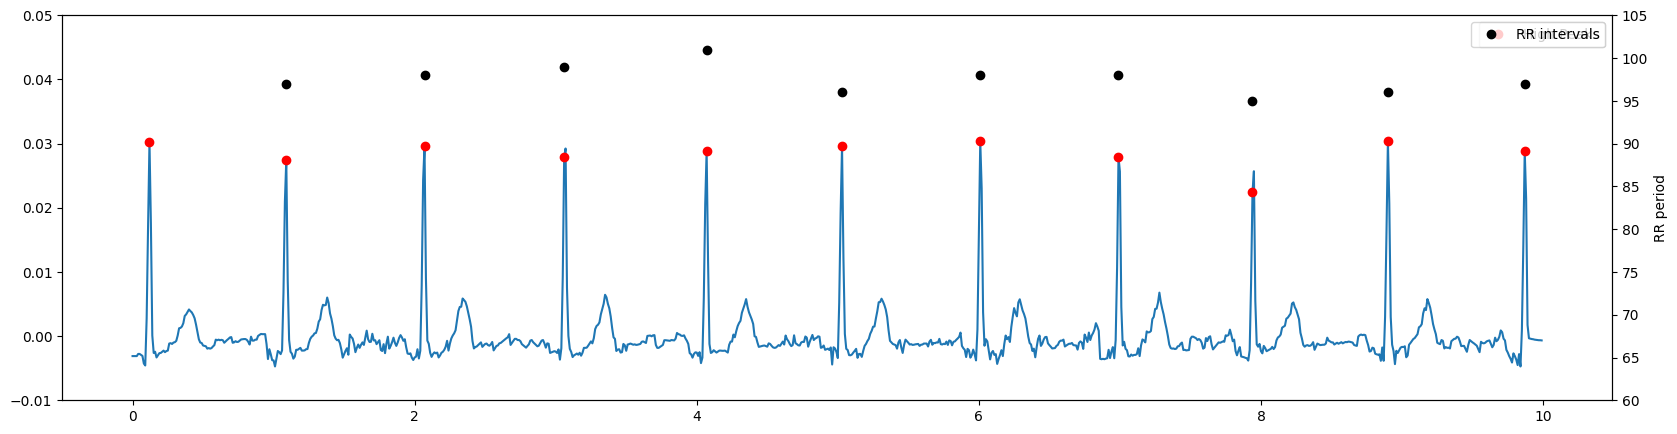

In [11]:
# rr_intervals is a list of the differences between the peaks
rr_intervals = []
for index in range(len(peaks) - 1):
    rr_intervals.append(peaks[index + 1] - peaks[index])

rr_intervals_time = [peak / fs for peak in peaks[1:]]
peaks_time = [peak / fs for peak in peaks]

fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()

ax1.plot(resampled_time, resampled_signal)
ax2.plot(rr_intervals_time, rr_intervals, marker='o', color='black', linestyle='None', label='RR intervals')
ax2.set_ylabel('RR period')
ax2.set_ylim(60, 105)
ax1.set_ylim(-0.01, 0.05)
ax1.plot(resampled_time[peaks], resampled_signal[peaks], marker='o', color='red', linestyle='None', label='High Peaks')
ax1.legend()
ax2.legend()
plt.show()

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [12]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [13]:
# Zde napište váš kód